In [347]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [348]:
sns.set_style('whitegrid')
sns.set_palette('flare')

In [349]:
test_cols = ['3P', '2P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
             '3PAr', 'FTr', 'TRB%', 'STL%', 'BLK%',
             'USG%', 'OWS', 'DWS', 'VORP', 'Year_x']

In [350]:
df = pd.read_csv('Full Dataset.csv', index_col=0)
df_copy = df.copy()
df.drop(columns=['All_Star'], inplace=True)
df.shape

(18264, 55)

In [351]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OBPM,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share
0,Kareem Abdul-Jabbar,5,32,LAL,82,0,38.3,10.2,16.9,0.604,...,4.8,2.4,7.2,7.3,1980,1.0,147.0,147.0,221.0,0.665
1,Tom Abernethy,4,25,GSW,67,0,18.2,2.3,4.7,0.481,...,-1.0,-0.2,-1.2,0.2,1980,0.0,0.0,0.0,0.0,0.000
2,Alvan Adams,5,25,PHO,75,0,28.9,6.2,11.7,0.531,...,1.7,1.9,3.6,3.1,1980,0.0,0.0,0.0,0.0,0.000
3,Tiny Archibald,1,31,BOS,80,80,35.8,4.8,9.9,0.482,...,1.4,-0.3,1.1,2.3,1980,5.0,2.0,2.0,221.0,0.009
4,Dennis Awtrey,5,31,CHI,26,0,21.5,1.0,2.3,0.450,...,-2.3,0.9,-1.4,0.1,1980,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,Thaddeus Young,4,33,TOT,52,1,16.3,2.7,5.2,0.518,...,0.1,2.1,2.2,0.9,2022,0.0,0.0,0.0,0.0,0.000
18260,Trae Young,1,23,ATL,76,76,34.9,9.4,20.3,0.460,...,7.1,-2.0,5.2,4.8,2022,0.0,0.0,0.0,0.0,0.000
18261,Omer Yurtseven,5,23,MIA,56,12,12.6,2.3,4.4,0.526,...,-1.4,0.4,-1.0,0.2,2022,0.0,0.0,0.0,0.0,0.000
18262,Cody Zeller,5,29,POR,27,0,13.1,1.9,3.3,0.567,...,-1.2,-1.0,-2.1,0.0,2022,0.0,0.0,0.0,0.0,0.000


In [352]:
df['Got_MVP_Votes'] = pd.Categorical(np.where(df['MVP_Share'] != 0, 1, 0))
df.Got_MVP_Votes = df.Got_MVP_Votes.astype(np.int64)

In [353]:

X = df.drop(columns=['Player', 'Tm', 'GS', 'MVP_Pts Won', 'MVP_Share', 'MVP_Pts Max', 'MVP_Rank', 'MVP_First',
                     'Got_MVP_Votes'])

X = X[test_cols]

y = df[['MVP_Share', 'Got_MVP_Votes', 'Year_x']]

In [354]:


year = 2022
X_train_reg = df.loc[(df['Got_MVP_Votes'] == 1) & (df.Year_x != year), test_cols + ['Got_MVP_Votes']]
y_train_reg = df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x != year), 'MVP_Share']

y_test_reg = df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x == year), 'MVP_Share']

X_train_reg

,3P,2P,FT,TRB,AST,STL,BLK,TOV,PF,PTS,...,FTr,TRB%,STL%,BLK%,USG%,OWS,DWS,VORP,Year_x,Got_MVP_Votes
0,0.0,10.2,4.4,10.8,4.5,1.0,3.4,3.6,2.6,24.8,...,0.344,15.4,1.2,4.6,24.1,9.5,5.3,7.3,1980,1
3,0.1,4.7,4.5,2.5,8.4,1.3,0.1,3.0,2.7,14.1,...,0.548,3.8,1.7,0.2,17.0,5.9,2.9,2.3,1980,1
17,0.7,7.7,3.7,10.4,4.5,1.7,0.6,3.2,3.4,21.3,...,0.246,16.0,2.3,1.0,25.3,5.6,5.6,4.8,1980,1
84,0.1,10.7,5.4,7.4,4.6,2.2,1.8,3.6,2.7,26.9,...,0.331,10.9,2.8,2.7,30.3,7.3,5.2,6.8,1980,1
97,0.4,12.7,6.5,5.2,2.6,1.4,1.0,3.3,2.7,33.1,...,0.306,7.3,1.6,1.4,31.7,9.3,1.3,4.4,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,1.5,4.8,2.4,4.5,8.9,1.4,0.3,2.2,2.4,16.4,...,0.206,8.0,2.2,0.8,22.6,6.5,2.7,3.6,2021,1
17539,2.3,6.2,4.9,10.2,6.0,0.9,0.3,3.4,3.2,24.1,...,0.325,14.7,1.2,0.6,29.3,3.4,4.3,3.9,2021,1
17557,1.0,4.7,2.2,2.6,4.2,1.0,0.4,1.6,1.1,14.7,...,0.208,5.5,1.9,1.4,25.8,1.6,1.6,1.3,2021,1
17575,0.1,5.6,3.0,7.2,6.9,1.6,0.6,3.0,2.9,14.3,...,0.492,12.2,2.4,1.7,20.2,2.7,3.3,2.3,2021,1


In [355]:

X_train = X[X['Year_x'] != year].copy()
X_test = X[X['Year_x'] == year].copy()
y_train = y[y['Year_x'] != year].copy()
y_test = y[y['Year_x'] == year].copy()
for i in [X_train, X_test, y_train, y_test]:
    i.drop(columns=['Year_x'], inplace=True)


In [356]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train['Got_MVP_Votes'])

RandomForestClassifier()

In [389]:
# # np.where(y_test['Got_MVP_Votes'] == 1,True,False)
# df
print('Precision:',metrics.precision_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test)),)
print('Recall:',metrics.recall_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test)))
print(f'F1: {metrics.f1_score(y_test["Got_MVP_Votes"],rf_clf.predict(X_test))}')



0.39128563229385876

In [358]:
y_test['Got_MVP_Votes']

17659    0
17660    0
17661    0
17662    0
17663    0
        ..
18259    0
18260    0
18261    0
18262    0
18263    0
Name: Got_MVP_Votes, Length: 605, dtype: int64

In [359]:
X_test['got_votes_pred'] = rf_clf.predict(X_test)
X_test_reg = X_test.loc[X_test.got_votes_pred == 1, X_test.drop(columns=['got_votes_pred']).columns]



In [360]:
pred_vote_getters =  df.loc[(X_test_reg.index),'Player'].tolist()

actual_vote_getters = df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x == year),'Player'].tolist()

tp = [i for i in pred_vote_getters if i in actual_vote_getters]
fn = [i for i in actual_vote_getters if i not in pred_vote_getters]
fp = [i for i in pred_vote_getters if i not in actual_vote_getters]
# tn = [i for i in pred_vote_getters if i in actual_vote_getters]
for i in tp:
    print(f'{i}, ',end='')

Giannis Antetokounmpo, DeMar DeRozan, Luka Dončić, Kevin Durant, Joel Embiid, LeBron James, Nikola Jokić, Ja Morant, Jayson Tatum, 

In [361]:
df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x == year),['Player','MVP_Share','MVP_Rank']].sort_values('MVP_Share',ascending=False)

,Player,MVP_Share,MVP_Rank
17948,Nikola Jokić,0.875,0.0
17820,Joel Embiid,0.706,1.0
17670,Giannis Antetokounmpo,0.595,2.0
17717,Devin Booker,0.216,3.0
17799,Luka Dončić,0.146,4.0
18184,Jayson Tatum,0.043,5.0
18048,Ja Morant,0.010,6.0
17784,Stephen Curry,0.004,7.0
18096,Chris Paul,0.002,8.0
17792,DeMar DeRozan,0.001,9.0


In [362]:
# for i in tp:
df.loc[(df.Year_x == year) & (df.Player.isin(fn)),['MVP_Share']].sum()/2.599999999999999

MVP_Share    0.085385
dtype: float64

In [363]:
X_train_reg.drop(columns=['Year_x', 'Got_MVP_Votes'], inplace=True)

In [364]:
rf = RandomForestRegressor()
rf.fit(X_train_reg, y_train_reg)

RandomForestRegressor()

In [365]:
y_test_reg = df.loc[X_test_reg.index, ['MVP_Share']]



In [366]:
pred = rf.predict(X_test_reg)

pred

array([0.64706, 0.04213, 0.3595 , 0.14473, 0.48572, 0.16627, 0.84699,
       0.11465, 0.06883, 0.1224 , 0.15252])

In [367]:
print(f'RMSE: {round(np.sqrt(metrics.mean_squared_error(df.loc[X_test_reg.index,"MVP_Share"],pred)),3)}')
print(f'MAE: {round(metrics.mean_absolute_error(df.loc[X_test_reg.index,"MVP_Share"],pred),5)}')
print(f'R2: {round(np.sqrt(metrics.r2_score(df.loc[X_test_reg.index,"MVP_Share"],pred)),3)}')

RMSE: 0.132
MAE: 0.1154
R2: 0.911


In [368]:
X_test_reg = df.loc[X_test_reg.index, :]
X_test_reg['Predicted Vote Share'] = pred
X_test_reg['Actual Vote Share'] = y_test_reg

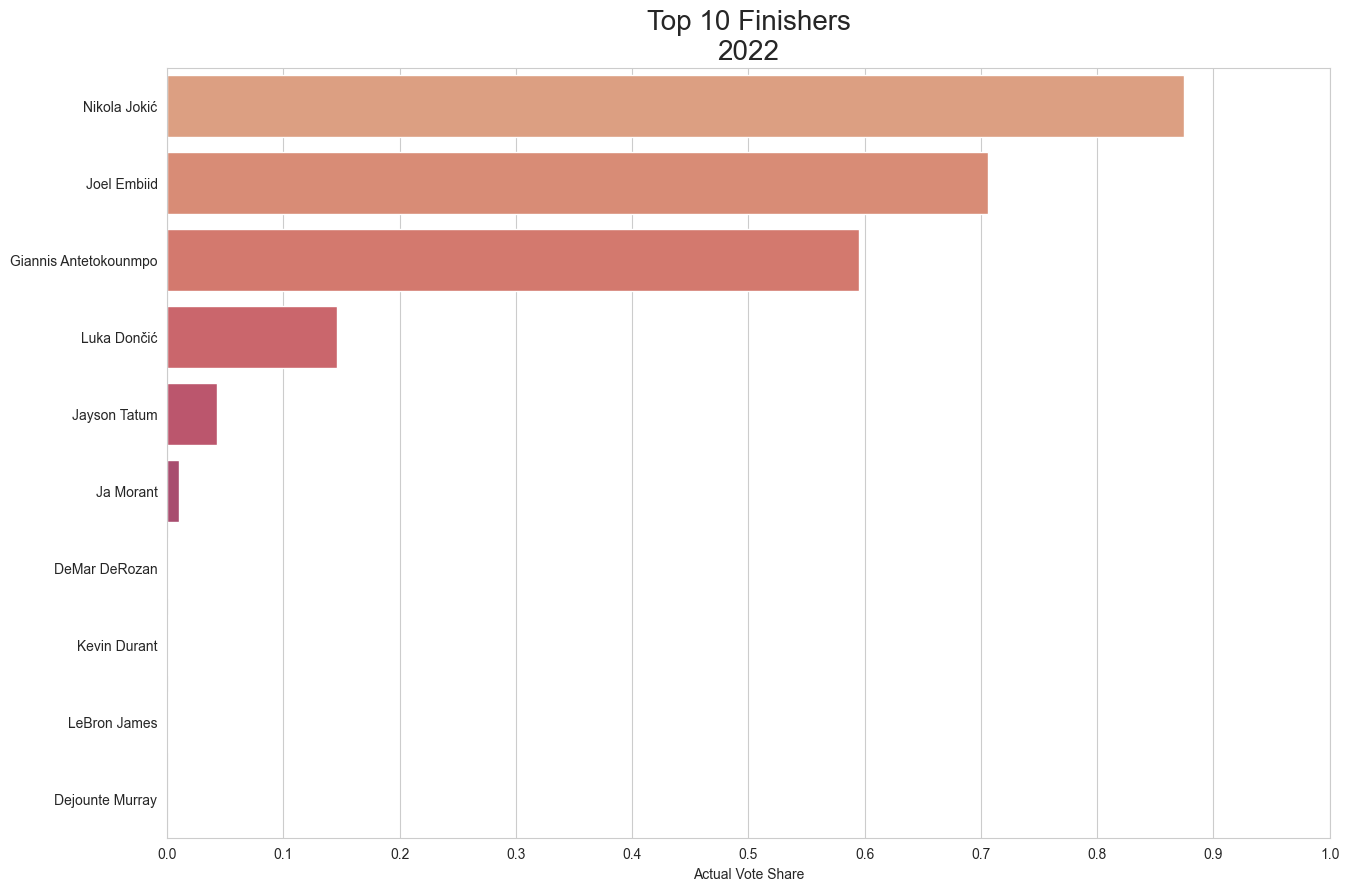

In [369]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))
sns.barplot(x='Actual Vote Share', y='Player',
            data=X_test_reg.sort_values('Actual Vote Share', ascending=False)[:10],palette=sns.color_palette('flare',10))
plt.xticks([i / 10 for i in range(0, 11, 1)])

plt.ylabel('')
plt.title(f'Top 10 Finishers\n{year}',fontdict={'size':20,})

plt.savefig(f'Top 10 Finishers {year}.png',dpi=400)


plt.show()

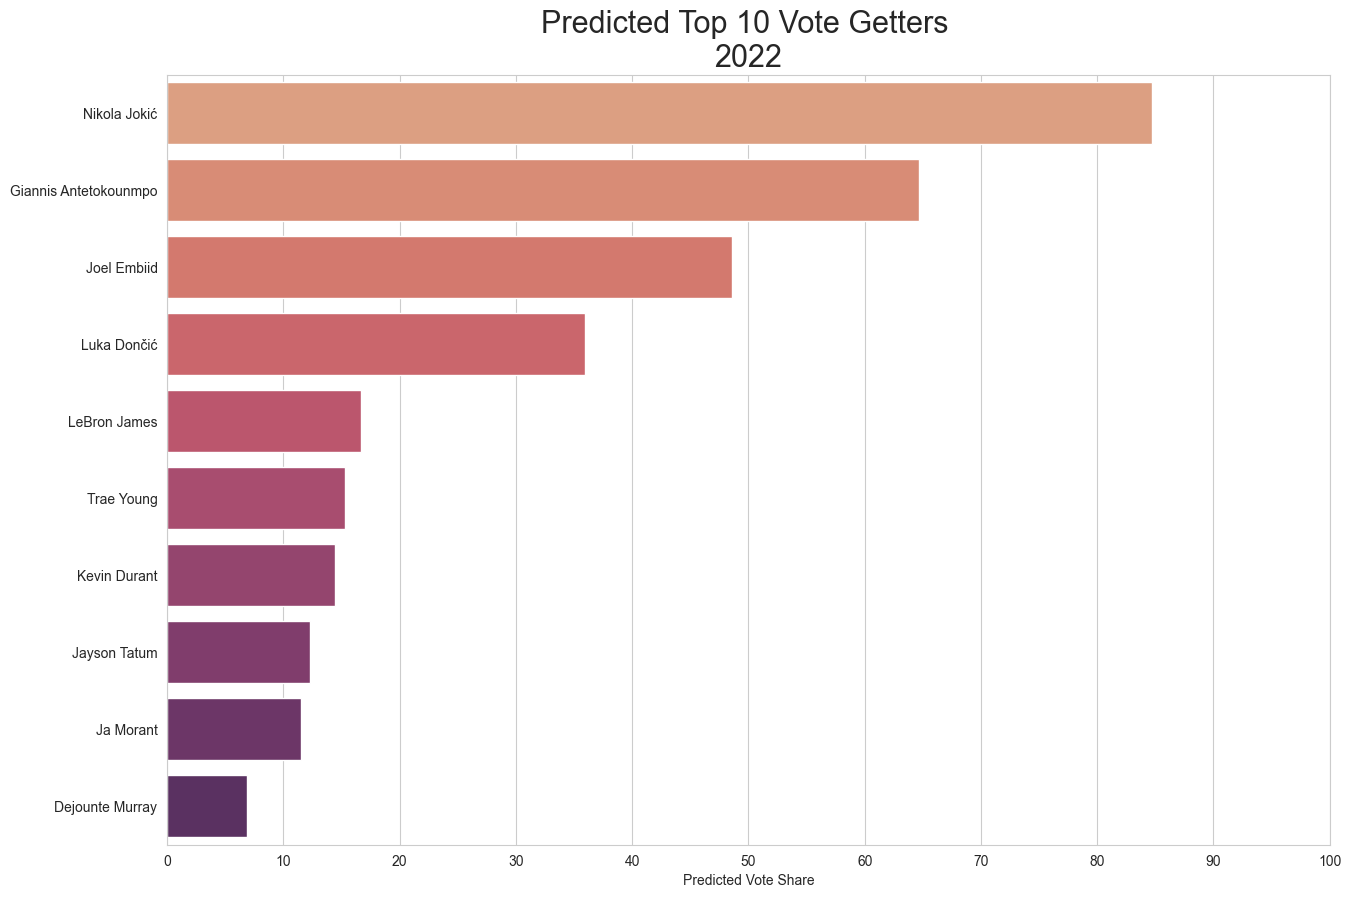

In [370]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))
X_test_reg['Predicted Vote Share'] =X_test_reg['Predicted Vote Share'] *100

sns.barplot(x='Predicted Vote Share', y='Player',
            data=X_test_reg.sort_values('Predicted Vote Share', ascending=False)[:10],palette=sns.color_palette('flare',10))
plt.xticks([i for i in range(0, 110, 10)])
plt.ylabel('')
plt.title(f'Predicted Top 10 Vote Getters \n{year}',fontdict={'size':22,})

plt.savefig(f'Predicted Top 10 Vote Getters {year}.png',dpi=400)

plt.show()

In [371]:
a = pd.DataFrame(columns=['Player','MVP Share','Predicted/Actual'])

In [372]:
X_test_reg = X_test_reg.sort_values('MVP_Share',ascending=False)

In [373]:
a['Player'] = pd.concat([X_test_reg.Player,X_test_reg.Player])
a['MVP Share'] = pd.concat([X_test_reg.MVP_Share,X_test_reg['Predicted Vote Share']])
a['Predicted/Actual'] = ['Actual']*len(X_test_reg) + ['Predicted']*len(X_test_reg)


a = a.append(pd.DataFrame({'Player':['Stephen Curry','Stephen Curry','Chris Paul','Chris Paul','Devin Booker','Devin Booker'],
 'MVP Share': [0,0.004,0,0.002,0,0.216],
 'Predicted/Actual': ['Predicted','Actual']*3})).sort_values(['MVP Share','Predicted/Actual'],ascending=[False]*2)

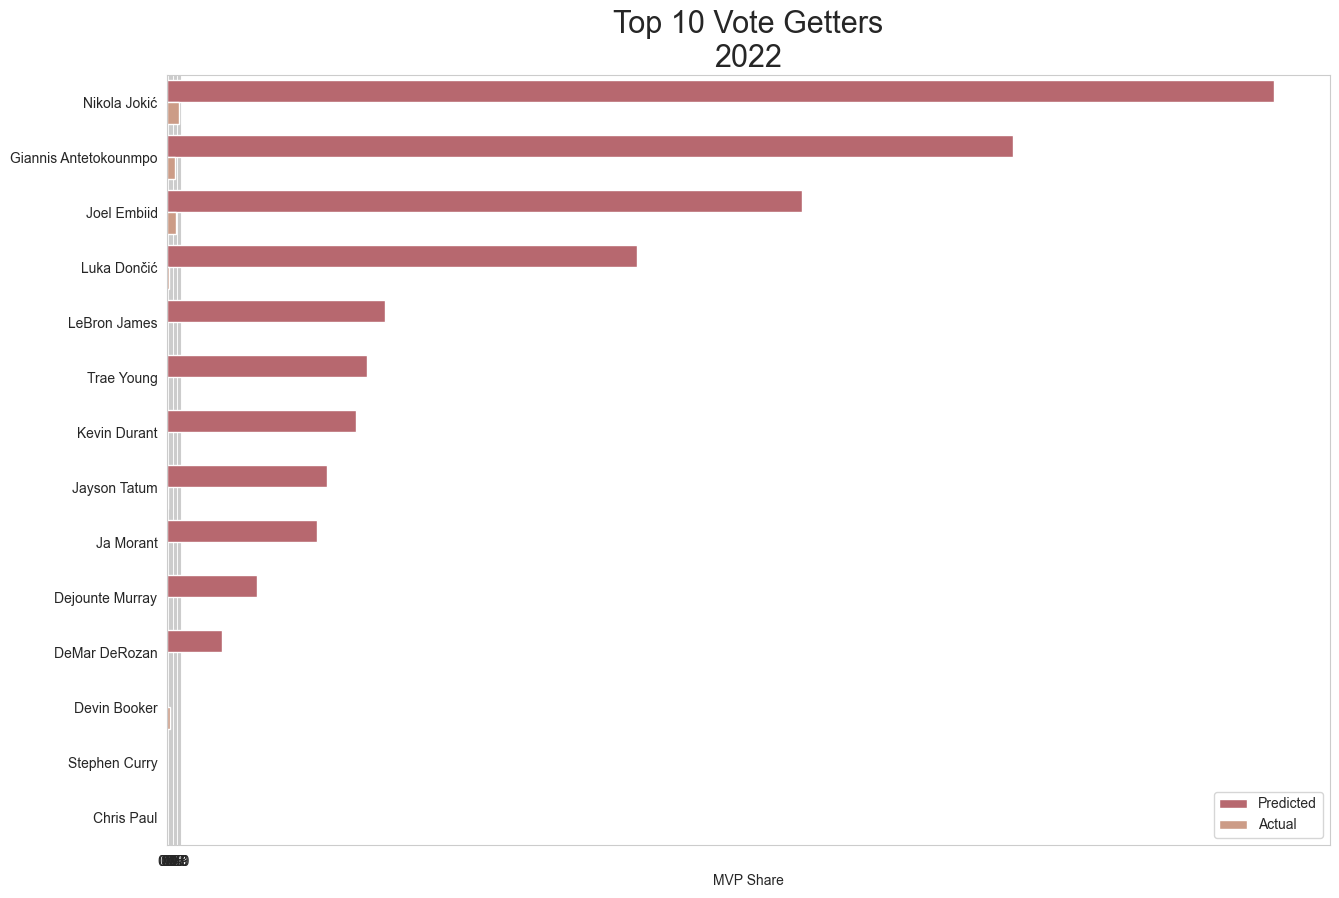

In [374]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))




sns.barplot(data=a,
    x='MVP Share', y="Player",hue='Predicted/Actual',
     palette=["#C45B64","#D8987B", ])

plt.xticks([i / 10 for i in range(0, 11, 1)])
plt.ylabel('')
plt.title(f'Top 10 Vote Getters\n{year}',fontdict={'size':22,})
plt.legend(fontsize=10, title_fontsize=15,loc='lower right')

plt.savefig(f'Top 10 Actual {year}.png',dpi=400)

plt.show()

In [375]:
X_test_reg.sort_values('MVP_Share',ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,Got_MVP_Votes,Predicted Vote Share,Actual Vote Share
17948,Nikola Jokić,5,26,DEN,74,74,33.5,10.3,17.7,0.583,...,9.8,2022,0.0,65.0,875.0,1000.0,0.875,1,84.699,0.875
17820,Joel Embiid,5,27,PHI,68,68,33.8,9.8,19.6,0.499,...,6.5,2022,1.0,26.0,706.0,1000.0,0.706,1,48.572,0.706
17670,Giannis Antetokounmpo,4,27,MIL,67,67,32.9,10.3,18.6,0.553,...,7.4,2022,2.0,9.0,595.0,1000.0,0.595,1,64.706,0.595
17799,Luka Dončić,1,22,DAL,65,65,35.4,9.9,21.6,0.457,...,5.9,2022,4.0,0.0,146.0,1000.0,0.146,1,35.950,0.146
18184,Jayson Tatum,3,23,BOS,76,76,35.9,9.3,20.6,0.453,...,4.8,2022,5.0,0.0,43.0,1000.0,0.043,1,12.240,0.043
18048,Ja Morant,1,22,MEM,57,57,33.1,10.2,20.6,0.493,...,3.9,2022,6.0,0.0,10.0,1000.0,0.010,1,11.465,0.010
17792,DeMar DeRozan,4,32,CHI,76,76,36.1,10.2,20.2,0.504,...,3.1,2022,9.0,0.0,1.0,1000.0,0.001,1,4.213,0.001
17812,Kevin Durant,4,33,BRK,55,55,37.2,10.5,20.3,0.518,...,4.8,2022,9.0,0.0,1.0,1000.0,0.001,1,14.473,0.001
17932,LeBron James,4,37,LAL,56,56,37.2,11.4,21.8,0.524,...,5.1,2022,9.0,0.0,1.0,1000.0,0.001,1,16.627,0.001
18058,Dejounte Murray,1,25,SAS,68,68,34.8,8.4,18.3,0.462,...,4.4,2022,0.0,0.0,0.0,0.0,0.000,0,6.883,0.000


In [376]:
a.append(pd.DataFrame({'Player':['Stephen Curry','Stephen Curry','Chris Paul','Chris Paul','Devin Booker','Devin Booker'],
 'MVP Share': [0,0.004,0,0.002,0,0.216],
 'Predicted/Actual': ['Predicted','Actual']*3})).sort_values('MVP Share',ascending=False)

,Player,MVP Share,Predicted/Actual
17948,Nikola Jokić,84.699,Predicted
17670,Giannis Antetokounmpo,64.706,Predicted
17820,Joel Embiid,48.572,Predicted
17799,Luka Dončić,35.950,Predicted
17932,LeBron James,16.627,Predicted
18260,Trae Young,15.252,Predicted
17812,Kevin Durant,14.473,Predicted
18184,Jayson Tatum,12.240,Predicted
18048,Ja Morant,11.465,Predicted
18058,Dejounte Murray,6.883,Predicted


In [377]:
b = df.loc[(df['MVP_Share'] != 0) & (df['Year_x'] == 2022),['Player','MVP_Share']]
b['Predicted/Actual'] = 'Actual'
b.columns = ['Player','MVP Share','Predicted/Actual']
# pd.merge(a,b)
a = pd.merge(a,b,how='outer',on=['Player','Predicted/Actual'])

a

,Player,MVP Share_x,Predicted/Actual,MVP Share_y
0,Nikola Jokić,84.699,Predicted,NaN
1,Giannis Antetokounmpo,64.706,Predicted,NaN
2,Joel Embiid,48.572,Predicted,NaN
3,Luka Dončić,35.950,Predicted,NaN
4,LeBron James,16.627,Predicted,NaN
5,Trae Young,15.252,Predicted,NaN
6,Kevin Durant,14.473,Predicted,NaN
7,Jayson Tatum,12.240,Predicted,NaN
8,Ja Morant,11.465,Predicted,NaN
9,Dejounte Murray,6.883,Predicted,NaN


In [378]:
a.drop(columns=['MVP Share_y'],inplace=True)
a.columns = ['Player','MVP Share','Predicted/Actual']
a

,Player,MVP Share,Predicted/Actual
0,Nikola Jokić,84.699,Predicted
1,Giannis Antetokounmpo,64.706,Predicted
2,Joel Embiid,48.572,Predicted
3,Luka Dončić,35.950,Predicted
4,LeBron James,16.627,Predicted
5,Trae Young,15.252,Predicted
6,Kevin Durant,14.473,Predicted
7,Jayson Tatum,12.240,Predicted
8,Ja Morant,11.465,Predicted
9,Dejounte Murray,6.883,Predicted


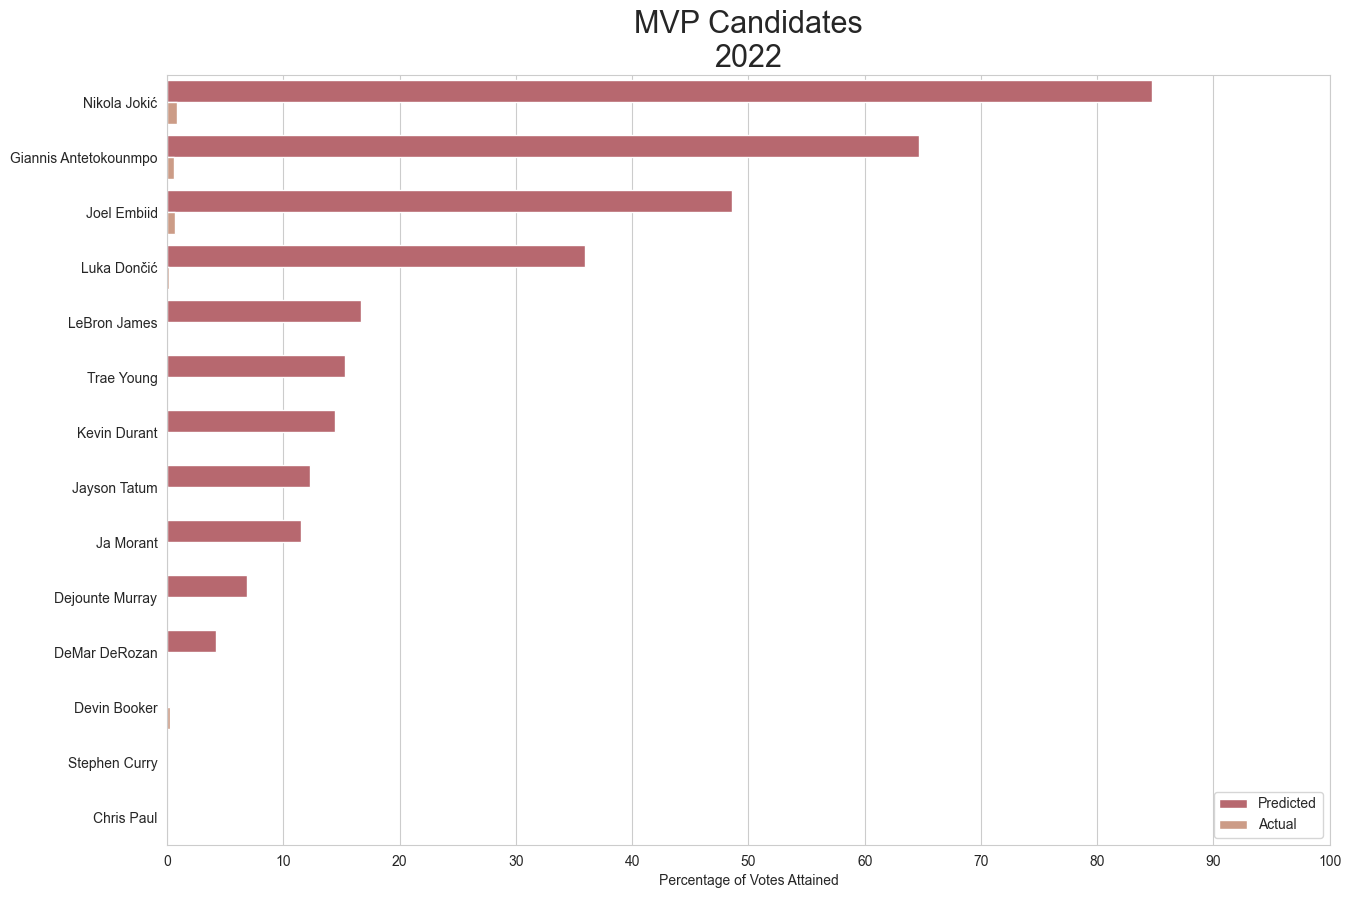

In [379]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))




sns.barplot(data=a.sort_values(['MVP Share','Player'],ascending=[False,False]),
    x='MVP Share', y="Player",hue='Predicted/Actual',
     palette=["#C45B64","#D8987B", ])
#
plt.xticks([i for i in range(0, 110, 10)])
plt.ylabel('')
plt.xlabel('Percentage of Votes Attained')
plt.title(f'MVP Candidates\n{year}',fontdict={'size':22,})
plt.legend(fontsize=10, title_fontsize=15,loc='lower right')
#
plt.savefig(f'Top 10 Actual {year}.png',dpi=400)

plt.show()

In [380]:
df.loc[(df.Player == 'Devin Booker') & (df.Year_x == year)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,Got_MVP_Votes
17717,Devin Booker,2,25,PHO,68,68,34.5,9.7,20.9,0.466,...,0.2,4.1,3.6,2022,3.0,0.0,216.0,1000.0,0.216,1


<AxesSubplot:xlabel='MVP Share', ylabel='Player'>

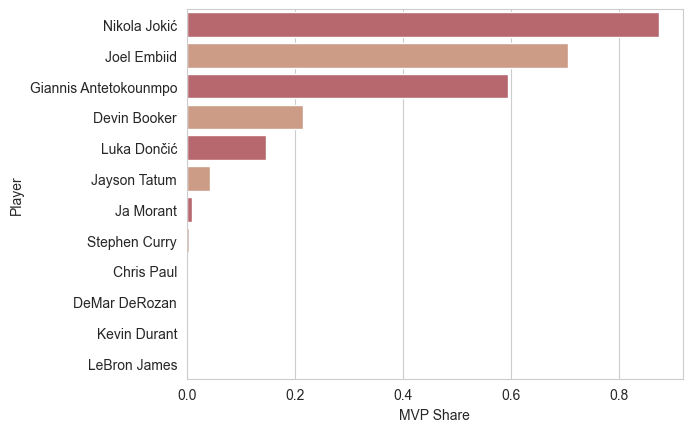

In [381]:
sns.set_style('whitegrid')

sns.barplot(data=a[(a['Predicted/Actual'] == 'Actual') & a['MVP Share'] > 0],x='MVP Share',y='Player',palette=["#C45B64","#D8987B", ])

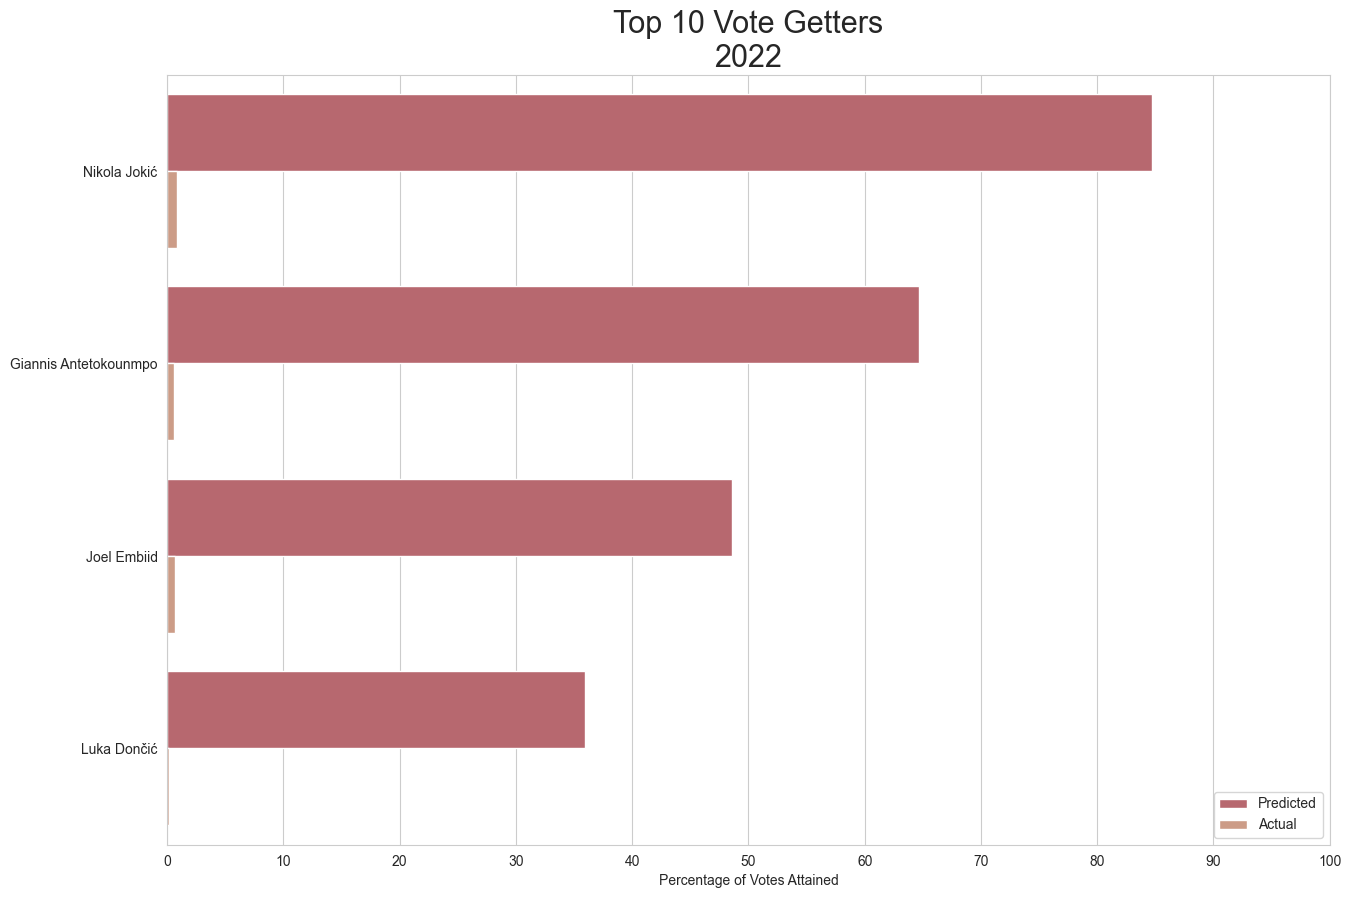

In [382]:
c = a[a.Player.isin(a[a['MVP Share' ]> 20].Player.unique().tolist())]

plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))




sns.barplot(data=c,
    x='MVP Share', y="Player",hue='Predicted/Actual',
     palette=["#C45B64","#D8987B", ])
#
plt.xticks([i for i in range(0, 110, 10)])
plt.ylabel('')
plt.xlabel('Percentage of Votes Attained')
plt.title(f'Top 10 Vote Getters\n{year}',fontdict={'size':22,})
plt.legend(fontsize=10, title_fontsize=15,loc='lower right')
#
# plt.savefig(f'Top 10 Actual {year}.png',dpi=400)


In [383]:
c.sort_values(['MVP Share','Predicted/Actual',],ascending=False)

,Player,MVP Share,Predicted/Actual
0,Nikola Jokić,84.699,Predicted
1,Giannis Antetokounmpo,64.706,Predicted
2,Joel Embiid,48.572,Predicted
3,Luka Dončić,35.950,Predicted
11,Nikola Jokić,0.875,Actual
12,Joel Embiid,0.706,Actual
13,Giannis Antetokounmpo,0.595,Actual
15,Luka Dončić,0.146,Actual


In [384]:
a

,Player,MVP Share,Predicted/Actual
0,Nikola Jokić,84.699,Predicted
1,Giannis Antetokounmpo,64.706,Predicted
2,Joel Embiid,48.572,Predicted
3,Luka Dončić,35.950,Predicted
4,LeBron James,16.627,Predicted
5,Trae Young,15.252,Predicted
6,Kevin Durant,14.473,Predicted
7,Jayson Tatum,12.240,Predicted
8,Ja Morant,11.465,Predicted
9,Dejounte Murray,6.883,Predicted


In [385]:
actual = df.loc[(df.MVP_Share != 0) & (df.Year_x == year)].sort_values('MVP_Share',ascending=False)
actual.MVP_Share = actual.MVP_Share*100

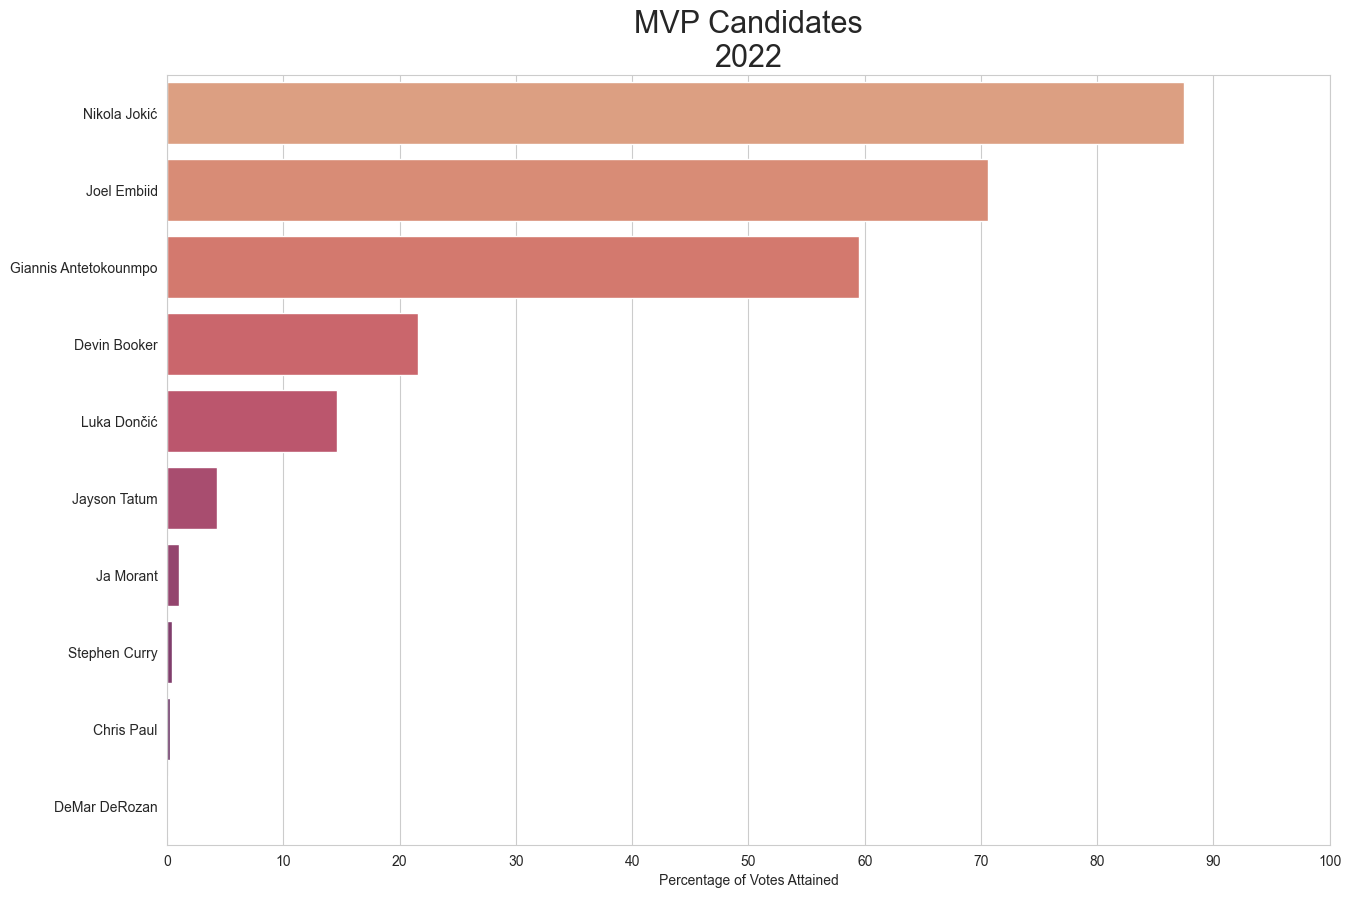

In [386]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))




sns.barplot(data=actual[:10],
    x='MVP_Share', y="Player",
     palette='flare')
#
plt.xticks([i for i in range(0, 110, 10)])
plt.ylabel('')
plt.xlabel('Percentage of Votes Attained')
plt.title(f'MVP Candidates\n{year}',fontdict={'size':22,})
# plt.legend(fontsize=10, title_fontsize=15,loc='lower right')
#
plt.savefig(f'Top 10 Actual {year}.png',dpi=400)

plt.show()